# Project: WEB ANALYTICS INSIGHTS

 ## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#feat_eng">Feature Engineering</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
# Introduction

In 2013, the e-commerce website has had flactuating visits. We'd like to understand the probable cause of this situation and discover possible insights to be used develop a data-driven strategy to engage and retain site visitors. The dataset contains traffic records of an ecommerce website.


**Questions to help understand the dataset**
- What is the daily distribution of site visitors.
- What is the monthly distribution of site visitors.
- What is the average orders made by clients.
- What is the trend of conversion rate?
- What is the trend of bounce rate?
- What is the trend of add_to_cart rate?



In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import statsmodels.api as sm
import scipy.stats as scistat

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_excel('Data\Web_Analytics_Data.xlsx')
df.head()

,DAY,VISITS,ORDERS,HAS_PURCHASED_PRIOR,DEVICE,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,GENDER,AGE,INCOME
0,2013-01-01,64340,2312,N,iPhone,21755,21501,41587,45582,F,24,451529
1,2013-01-02,63958,2427,N,iPhone,15675,21355,41392,45456,F,22,384768
2,2013-01-03,67390,2230,Y,iPhone,28199,17086,46559,51972,M,71,283793
3,2013-01-04,58305,1814,N,iPhone,24380,17172,35612,41043,M,51,417355
4,2013-01-05,74434,2333,Y,iPhone,15518,19392,44692,55954,F,32,99205


In [3]:
df.shape

(5110, 12)

<a id='wrangling'></a>
# Data Wrangling

**Assessing Data**

In [4]:
data = df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DAY                  5110 non-null   datetime64[ns]
 1   VISITS               5110 non-null   int64         
 2   ORDERS               5110 non-null   int64         
 3   HAS_PURCHASED_PRIOR  5110 non-null   object        
 4   DEVICE               5110 non-null   object        
 5   BOUNCES              5110 non-null   int64         
 6   ADD_TO_CART          5110 non-null   int64         
 7   PRODUCT_PAGE_VIEWS   5110 non-null   int64         
 8   SEARCH_PAGE_VIEWS    5110 non-null   int64         
 9   GENDER               5110 non-null   object        
 10  AGE                  5110 non-null   int64         
 11  INCOME               5110 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 479.2+ KB


In [6]:
data.head(5).T

,0,1,2,3,4
DAY,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
VISITS,64340,63958,67390,58305,74434
ORDERS,2312,2427,2230,1814,2333
HAS_PURCHASED_PRIOR,N,N,Y,N,Y
DEVICE,iPhone,iPhone,iPhone,iPhone,iPhone
BOUNCES,21755,15675,28199,24380,15518
ADD_TO_CART,21501,21355,17086,17172,19392
PRODUCT_PAGE_VIEWS,41587,41392,46559,35612,44692
SEARCH_PAGE_VIEWS,45582,45456,51972,41043,55954
GENDER,F,F,M,M,F


In [7]:
# Remove trailing whitespaces

def remove_spaces(df):
    for col in df.columns:
        if df[col].dtypes == 'object':
            df[col] = df[col].str.strip()

remove_spaces(data)

In [8]:
# Converting objects to category

data.loc[:, data.dtypes == 'object'] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

Checking for missing values.

In [11]:
data.isnull().sum().any()

False

<AxesSubplot:>

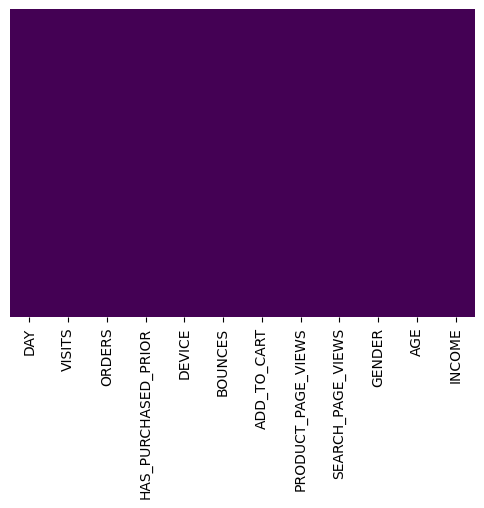

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels = False)

Check for duplicates

In [21]:
data.duplicated().sum()

0

**Findings and Actions**

- No missing values.
- Convert `object` data types to `category`.
- No duplicates.


In [37]:
data.describe()

,VISITS,ORDERS,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,AGE,INCOME
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,183480.110959,6410.258904,60133.768689,54968.698239,119285.097260,137587.489237,48.517417,258453.877886
std,250006.872086,8775.732587,85182.114110,75401.482153,162983.051841,187651.313442,18.147166,139310.205224
min,1518.000000,46.000000,343.000000,394.000000,941.000000,1068.000000,18.000000,15049.000000
25%,22844.000000,799.000000,7101.500000,6775.500000,14765.000000,17177.750000,33.000000,138866.000000
50%,60452.500000,2095.500000,19077.500000,18086.000000,39293.000000,45558.000000,48.000000,260371.500000
75%,284524.250000,9646.750000,77862.500000,82423.750000,183667.500000,214094.750000,64.000000,379528.750000
max,824880.000000,32895.000000,369338.000000,284697.000000,575068.000000,655291.000000,80.000000,499838.000000


Checking for unique values in every column

In [22]:
data.nunique()

DAY                     365
VISITS                 5024
ORDERS                 3706
HAS_PURCHASED_PRIOR       2
DEVICE                    7
BOUNCES                4904
ADD_TO_CART            4869
PRODUCT_PAGE_VIEWS     4979
SEARCH_PAGE_VIEWS      5023
GENDER                    2
AGE                      63
INCOME                 5079
dtype: int64

<a id="feat_eng"></a>
# Feature Engineering

In [23]:
# Create age groups from AGE
bin_labels = ["{0} - {1}".format(age+1, age + 5) for age in range(15, 80, 5)]

data['AGE_GROUP'] = pd.cut(x=data['AGE'], bins=len(bin_labels), labels=bin_labels)

In [24]:
data['CONVERSION_RATE'] = data['ORDERS'] / data['VISITS']
data['BOUNCE_RATE'] = data['BOUNCES'] / data['VISITS']
data['ADD_TO_CART_RATE'] = data['ADD_TO_CART'] / data['VISITS']

In [25]:
data.head()

,DAY,VISITS,ORDERS,HAS_PURCHASED_PRIOR,DEVICE,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,GENDER,AGE,INCOME,AGE_GROUP,CONVERSION_RATE,BOUNCE_RATE,ADD_TO_CART_RATE
0,2013-01-01,64340,2312,N,iPhone,21755,21501,41587,45582,F,24,451529,21 - 25,0.035934,0.338126,0.334178
1,2013-01-02,63958,2427,N,iPhone,15675,21355,41392,45456,F,22,384768,16 - 20,0.037947,0.245083,0.333891
2,2013-01-03,67390,2230,Y,iPhone,28199,17086,46559,51972,M,71,283793,71 - 75,0.033091,0.418445,0.253539
3,2013-01-04,58305,1814,N,iPhone,24380,17172,35612,41043,M,51,417355,46 - 50,0.031112,0.418146,0.294520
4,2013-01-05,74434,2333,Y,iPhone,15518,19392,44692,55954,F,32,99205,26 - 30,0.031343,0.208480,0.260526


### **Validations**

In [39]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

The selected dataframe has 16 columns and 5110 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [46]:
len(data)

5110

In [40]:
data.head()

,DAY,VISITS,ORDERS,HAS_PURCHASED_PRIOR,DEVICE,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,GENDER,AGE,INCOME,AGE_GROUP,CONVERSION_RATE,BOUNCE_RATE,ADD_TO_CART_RATE
0,2013-01-01,64340,2312,N,iPhone,21755,21501,41587,45582,F,24,451529,21 - 25,0.035934,0.338126,0.334178
1,2013-01-02,63958,2427,N,iPhone,15675,21355,41392,45456,F,22,384768,16 - 20,0.037947,0.245083,0.333891
2,2013-01-03,67390,2230,Y,iPhone,28199,17086,46559,51972,M,71,283793,71 - 75,0.033091,0.418445,0.253539
3,2013-01-04,58305,1814,N,iPhone,24380,17172,35612,41043,M,51,417355,46 - 50,0.031112,0.418146,0.294520
4,2013-01-05,74434,2333,Y,iPhone,15518,19392,44692,55954,F,32,99205,26 - 30,0.031343,0.208480,0.260526


<a id="eda"></a>
# Exploratory Data Analysis

### Univariate Analysis

#### Categorical Data

In [26]:
data.select_dtypes(include='category').columns

Index(['HAS_PURCHASED_PRIOR', 'DEVICE', 'GENDER', 'AGE_GROUP'], dtype='object')

What is the most used device?

In [27]:
def univariate_barplot(data, order_data, angle):
    plt.figure(figsize=(8,4))
    sns.barplot(x = data.index, y = data.values, color = sns.color_palette()[0], order=order_data)
    plt.xticks(rotation=angle)
    plt.show();

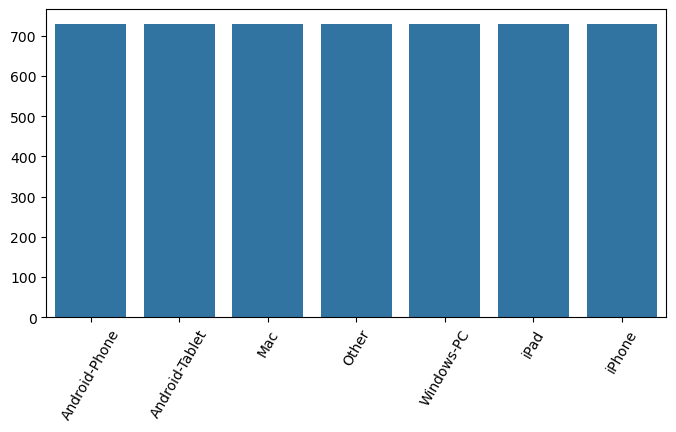

In [28]:
devices_used = data['DEVICE'].value_counts()

univariate_barplot(devices_used, None, 60)

All the devices had equal registries.

What is the distribution in terms of prior purchases?

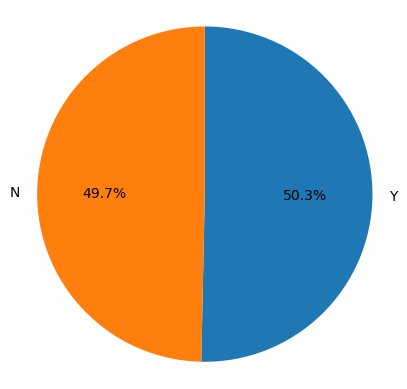

In [29]:
prior_purchases = data['HAS_PURCHASED_PRIOR'].value_counts()

values = prior_purchases.values
labels = prior_purchases.index

plt.pie(x = values, labels = labels, autopct='%0.01f%%', startangle=90, counterclock=False);
plt.axis('square');

Most visitors have had prior purchases

What is the gender distribution of the visitors?

In [30]:
gender_distr = data['GENDER'].value_counts()
gender_distr


M    2585
F    2525
Name: GENDER, dtype: int64

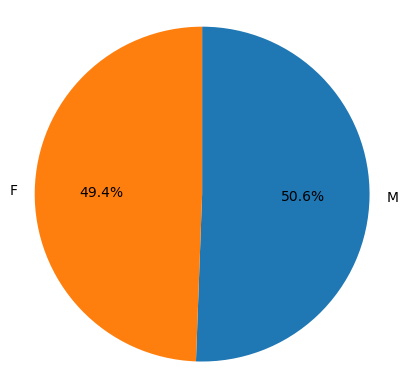

In [31]:
values = gender_distr.values
labels = gender_distr.index

plt.pie(x = values, labels = labels, autopct='%0.01f%%', startangle=90, counterclock=False)
plt.axis('square');

Most visitors are males

#### Numerical Data

In [37]:
num_cols = data.select_dtypes(exclude=['datetime64[ns]','category']).columns
num_cols

Index(['VISITS', 'ORDERS', 'BOUNCES', 'ADD_TO_CART', 'PRODUCT_PAGE_VIEWS',
       'SEARCH_PAGE_VIEWS', 'AGE', 'INCOME', 'CONVERSION_RATE', 'BOUNCE_RATE',
       'ADD_TO_CART_RATE'],
      dtype='object')

In [63]:
# Check Visits distribution

def hist_plot(col, data):
    plt.figure(figsize = [20, 8]) 

    plt.subplot(1, 2, 1)
    plt.title('{} Histogram'.format(col))
    sns.histplot(x = '{}'.format(col), data=data)
    plt.axvline(data['{}'.format(col)].mean(), color='red',linestyle='dashed', linewidth=1)

    plt.subplot(1, 2, 2)
    base_color = sns.color_palette()[1]
    sns.boxplot(y = '{}'.format(col), data=data, color = base_color)
    plt.title('Visits Boxplot')
    plt.xticks(rotation = 15)
    plt.show();

    

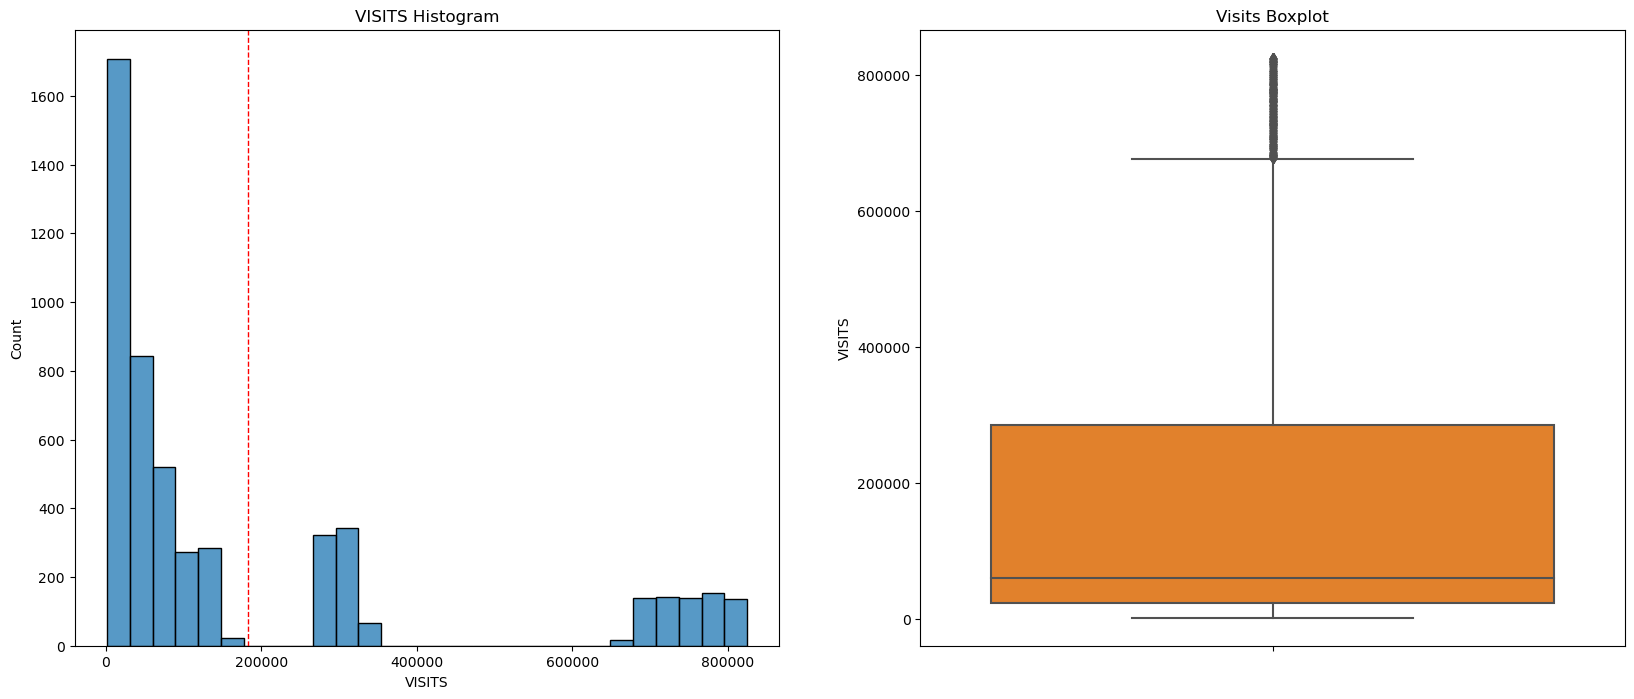

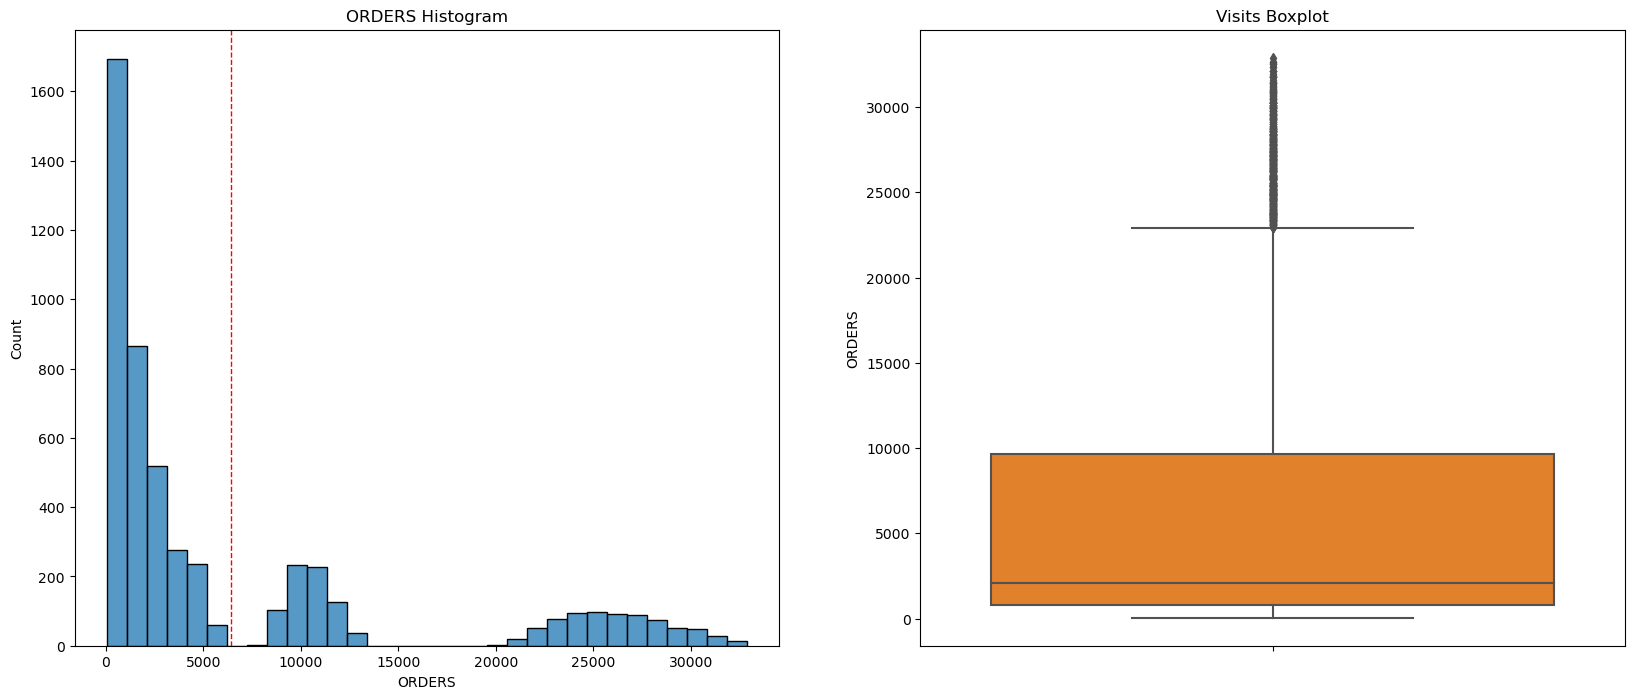

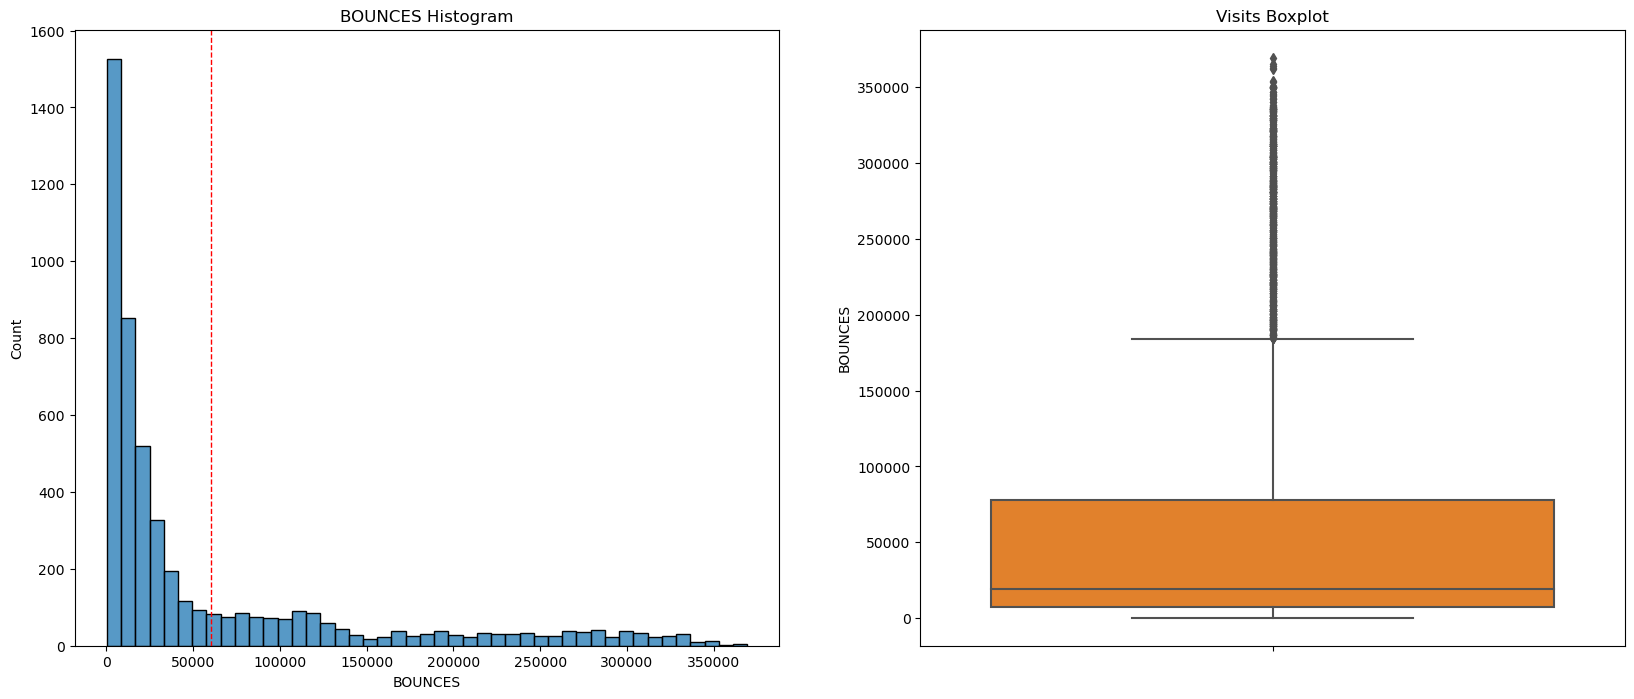

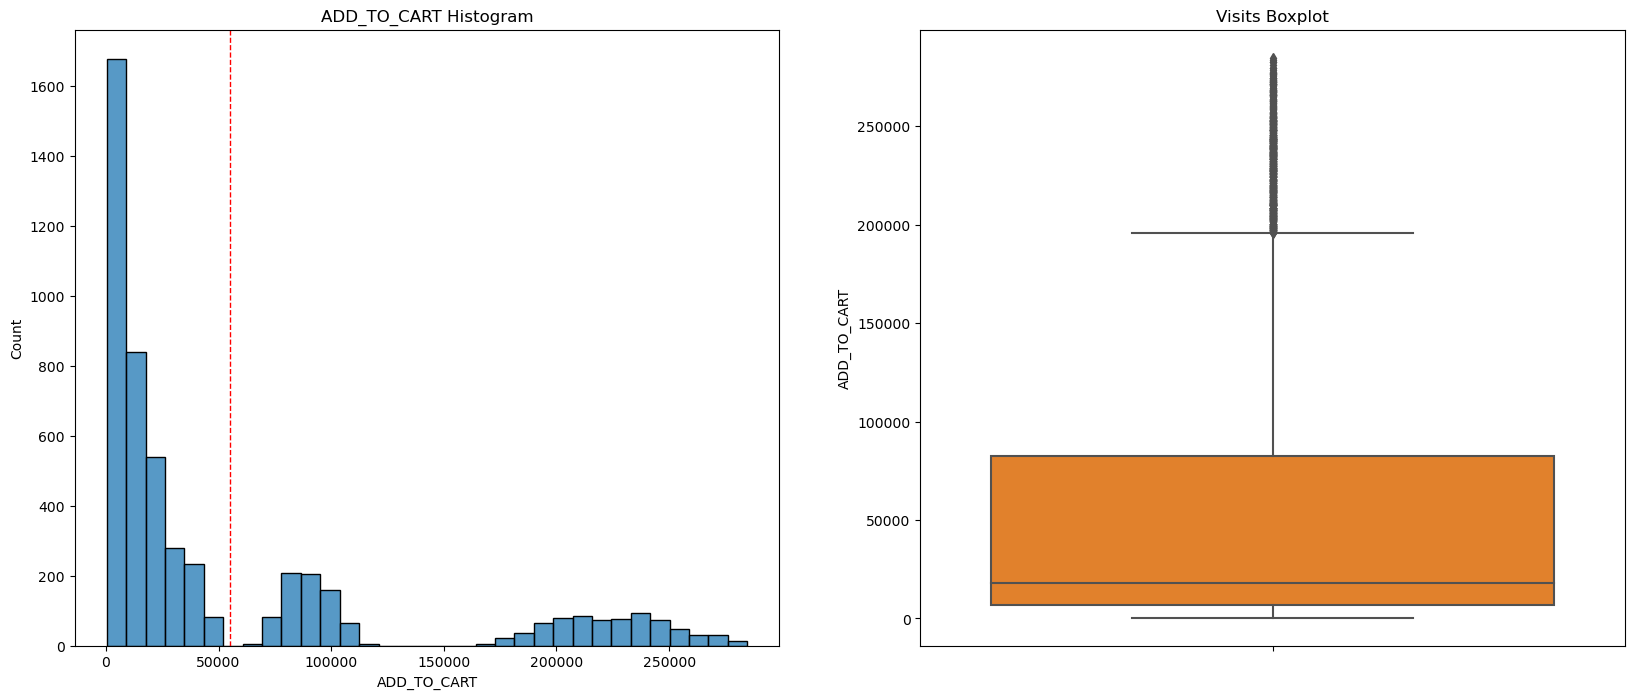

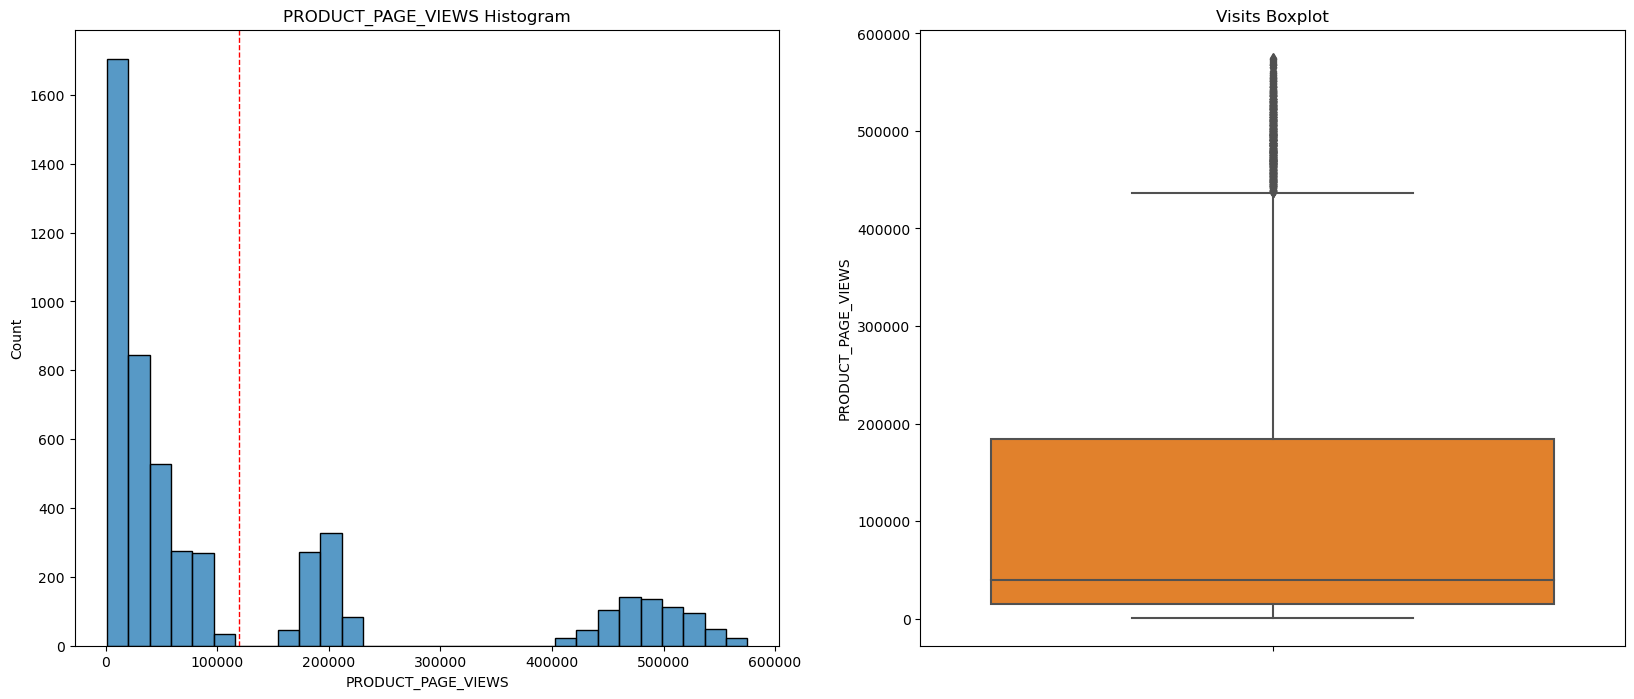

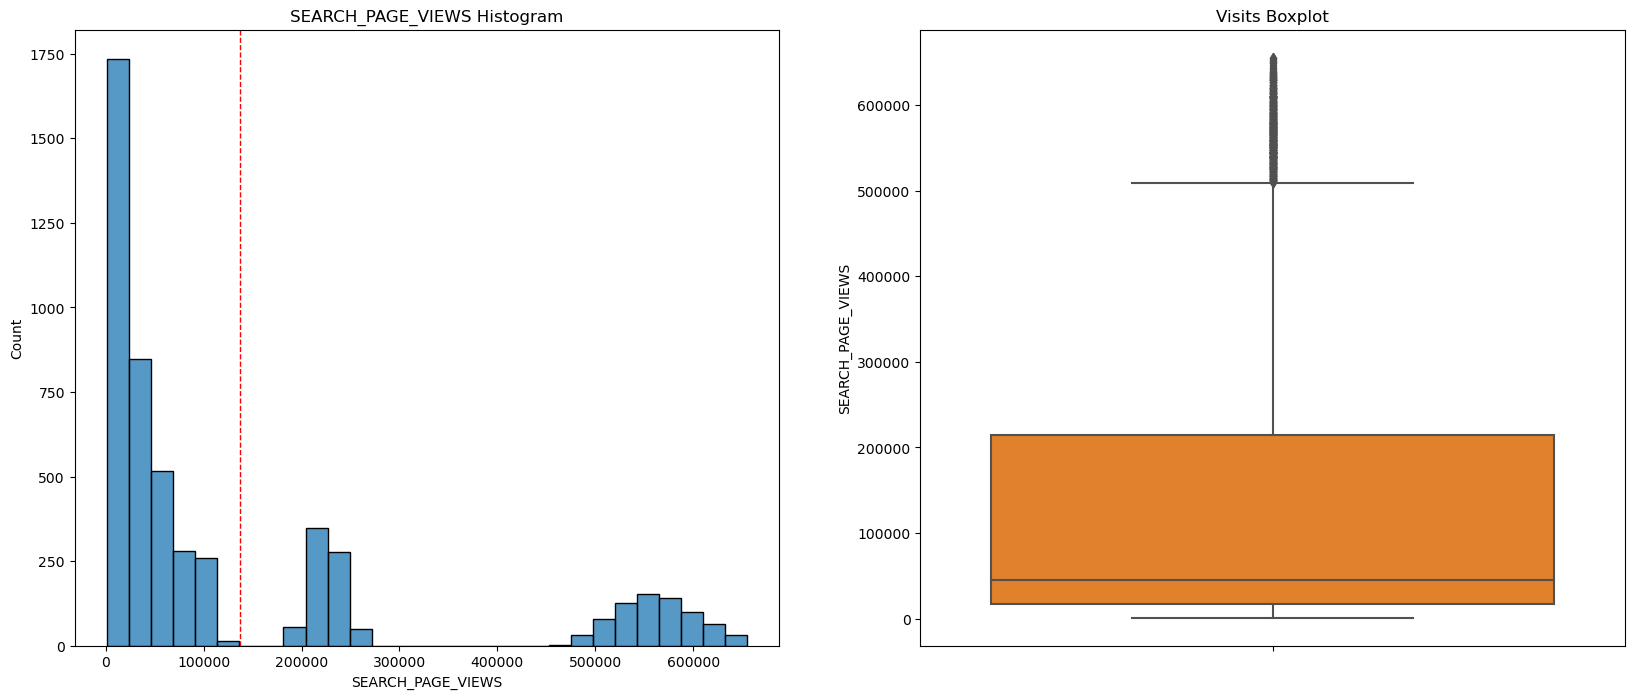

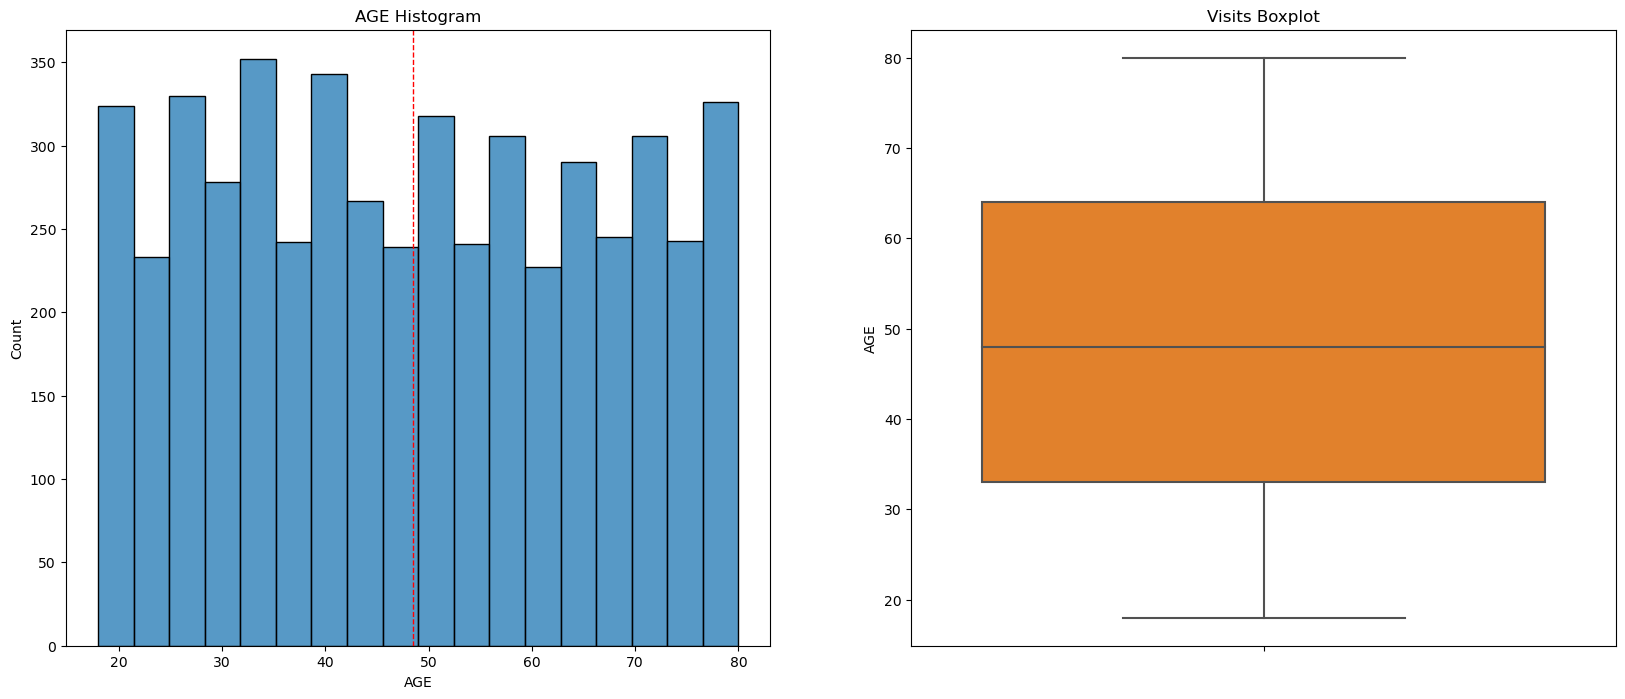

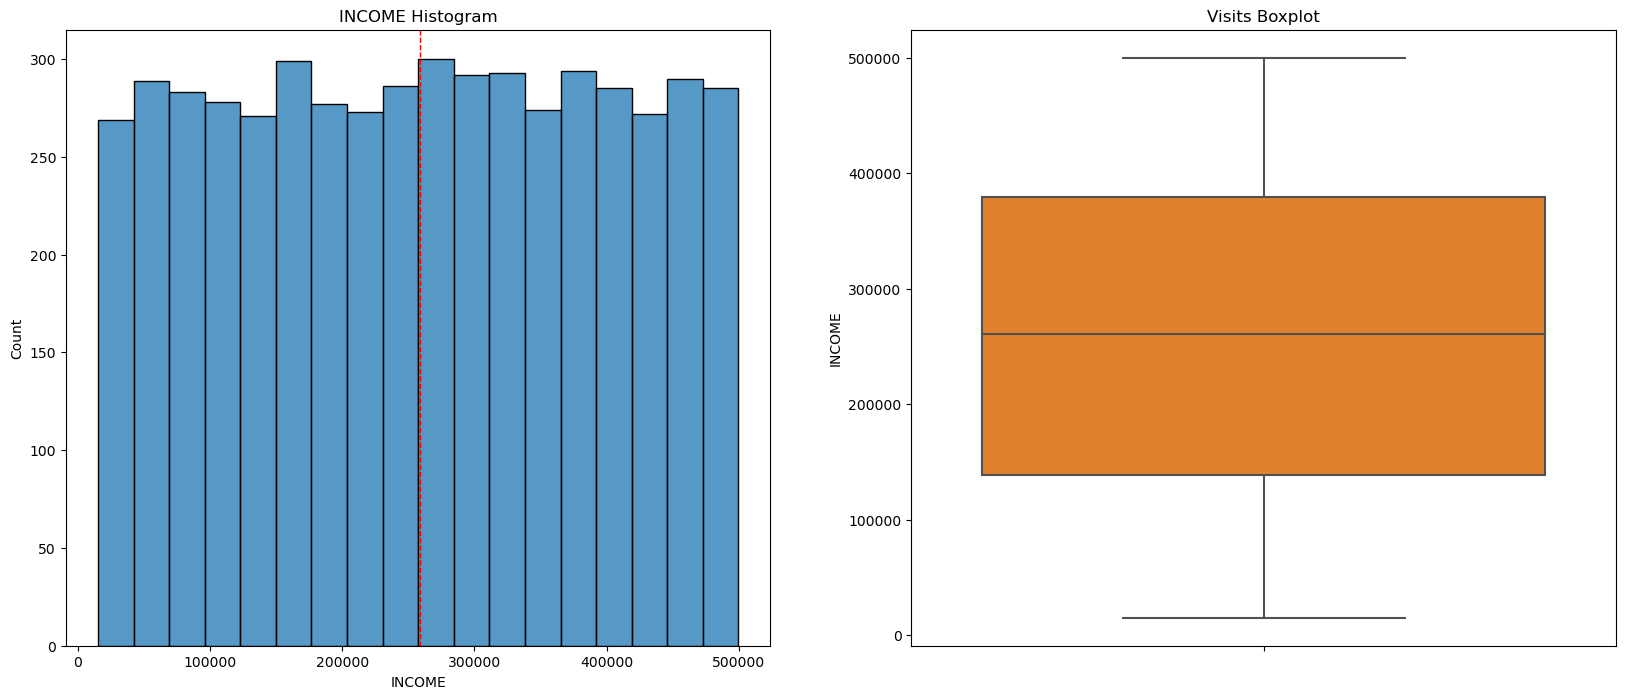

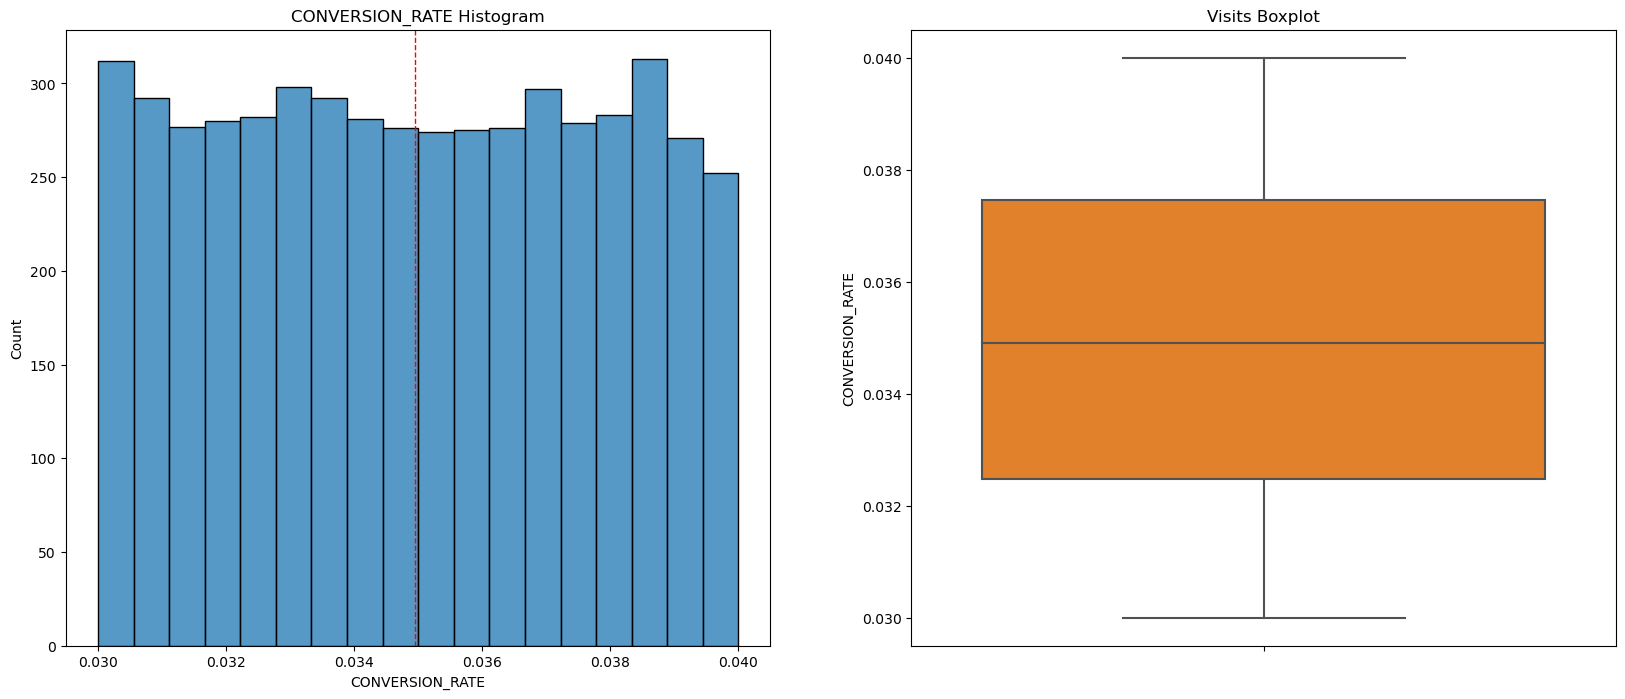

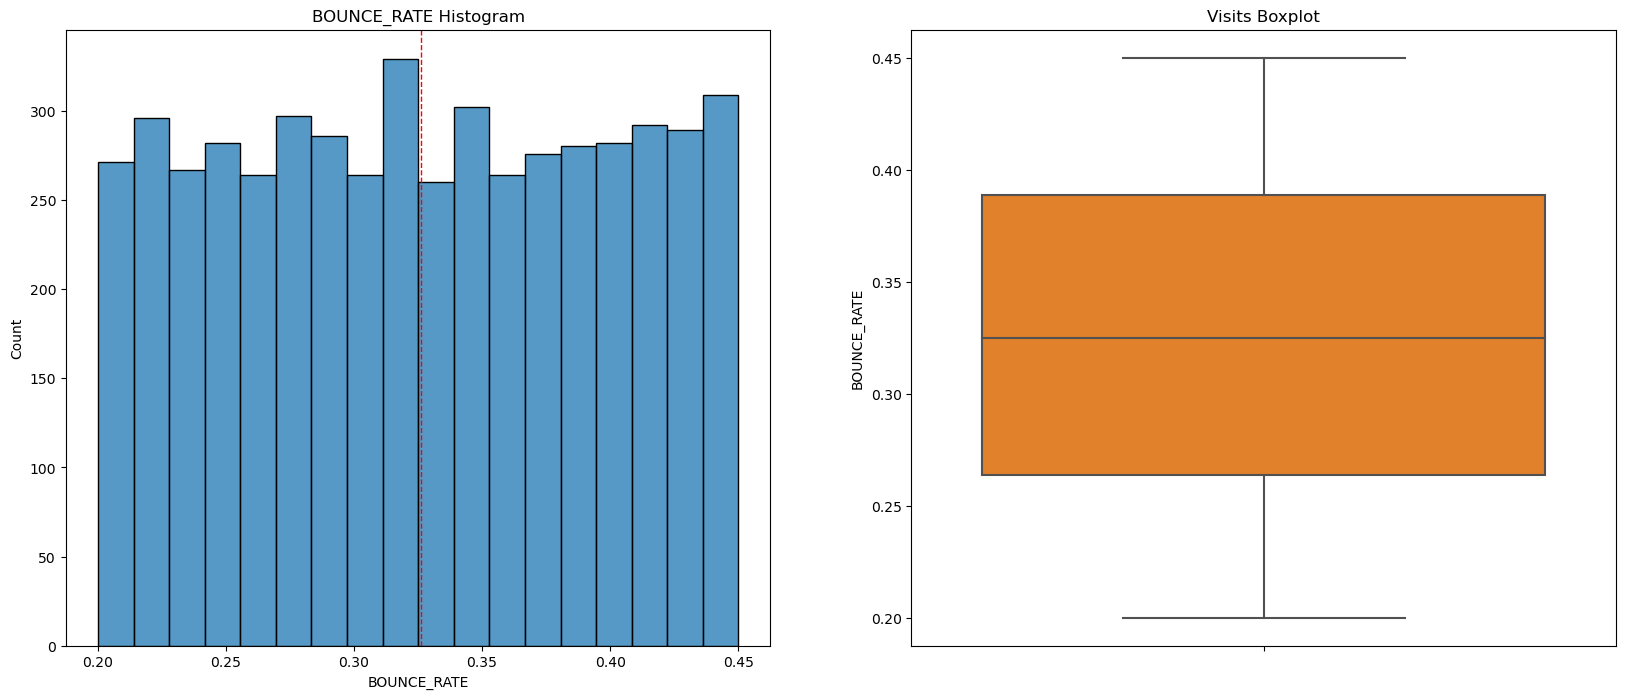

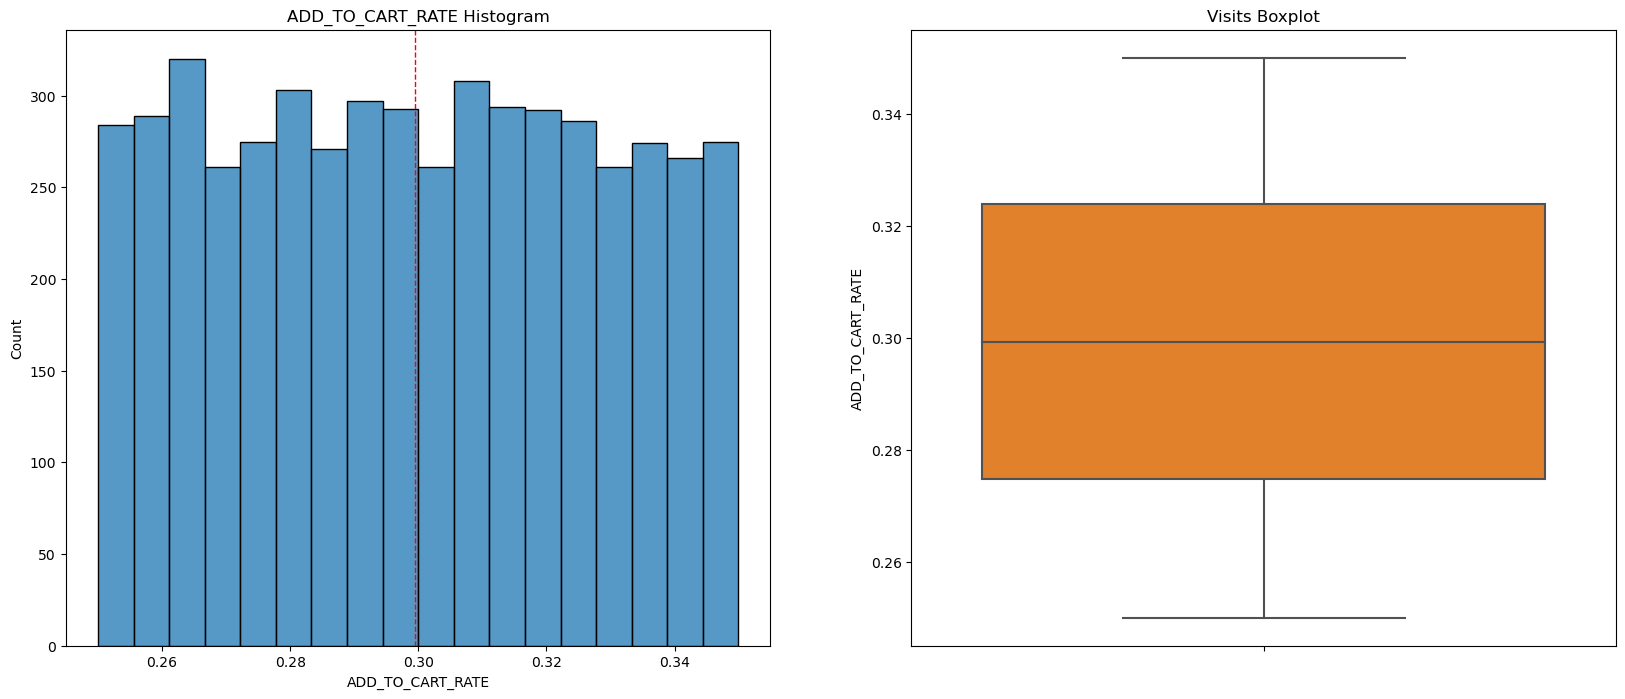

In [64]:
for x in num_cols:
    hist_plot(x, data)

## **Findings**

### Univariate Analysis
------

- All the devices had equal registries.
- `50.3%` of the visitors have had prior purchases
- `50.6%` of the visitors are males

- The hughest number of visits is `824880` and it's skewed to the right with some outliers
- `AGE`, `INCOME`, `CONVERSION_RATE`, `BOUNCE_RATE` and `ADD_TO_CART_RATE` have no outliers and are `uniformly distributed`.

### Bivariate Analysis
------